# Project: TMDB-Movies

## Table of Contents
> <ul>
> <li><a href="#intro">Introduction</a></li>
>
> <li><a href="#wrangling">Data Wrangling</a></li>
> 
> <li><a href="#eda">Exploratory Data Analysis</a></li> 
> 
> <li><a href="#subset">subset the data with Profit</a></li>  
> 
> <li><a href="#conclusions">Conclusions</a></li>
> </ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb),
>
> including user ratings and revenue.
>
> Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
>
> There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave 
>
> them as is.
>
> As mentioned before the budget and revenue column do not have currency unit, it might be possible different movies have 
> budget in different  currency according to the country they are produce in.
> we will use the two columns ending with "_adj" (budget_adj and revenue_adj) as that show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

> ### Question(s) for Analysis
> <ul>
> <li><a href="#q1">The relation between Year of release vs Profitability</a></li>
> <li><a href="#q2">Which genres are most popular from year to year?</a></li>
> <li><a href="#q3">The most profit decade by decade?</a></li>
> <li><a href="#q4">The most budjet decade by decade?</a></li>
> <li><a href="#q5">The most revenue decade by decade?</a></li>
> <li><a href="#q6">Shows the distribution of the budget by genres</a></li>
> </ul>
             

In [1]:
# !pip install pandas==1.1.5

In [2]:
# Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set()

In [3]:
# Constants
DATA_FILE = 'Database_TMDb_movie_data/tmdb-movies.csv'
DROP_COLUMNS = ['imdb_id', 'budget', 'revenue', 'homepage', 'production_companies', 'tagline', 'overview', 'release_date', 'keywords']

## Functions

In [4]:
# missing Data
def per_missing(df):
    
    """ 
    Select the columns that have missing values and summition of the missing values 
    and the percent of the missing valus from all the data
        
    parameters:
    * df: Data Frame
    
    Rerurns: missing table that contains the count of missing values and it's percentage
    
    """
    
    missing_count = df.isna().sum().sort_values(ascending=False)
    missing_percent = (100 * df.isna().sum().sort_values(ascending=False)) / len(df)
    missing_count = pd.DataFrame(missing_count[missing_count>0])
    missing_percent = pd.DataFrame(missing_percent[missing_percent>0])
    missing_table = pd.concat([missing_count, missing_percent], axis=1)
    missing_table.columns = ['missing_count', 'missing_percent']
    
    return missing_table

# ------------------------------------------------------------------------------------------------------

# Visualization
def bar_plot(x, y, data):
    """
    make a bae plot chart for the data without confidence interval
    
    parameters:
    * x: the column will be draw on the x axis
    * y: the column will be draw on the y axis    
    """
    plt.figure(figsize = (8,4), dpi = 100)
    sns.barplot(x = x, y = y, data=data, ci=None)
    
    # optinal after ploting clean up variable nmaes
    x = x.replace("_", " ")
    y = y.replace("_", " ")
    
    # adding title and format it
    plt.title(f'Average {y} by {x}'.title(), fontsize=14, weight='bold')
    
    # adding x label and format it
    plt.xlabel(x.title(), fontsize=10, weight="bold")
    
    # adding y label and format it
    plt.ylabel(f'Average {y}'.title(), fontsize=10, weight="bold")
    
    plt.show()
    

# box plot
def box_plot(x, y, data, ylog=True):
    """
     make a box plot chart for the data 
    
     parameters:
     * x: the column will be draw on the x axis
     * y: the column will be draw on the y axis  
     * data: data frame
     * ylog: boolean value for take log for y axis data
     """    
    plt.figure(figsize = (8,4), dpi = 100)
    sns.boxplot(x = x ,y = y,
                data = data)
    
    # if need log
    if ylog:
        plt.yscale('log')
        
    # optinal after ploting clean up variable nmaes
    x = x.replace("_", " ")
    y = y.replace("_", " ")
    
    # adding title and format it
    plt.title(f'The distribution of the {y} by {x}'.title(), fontsize=14, weight="bold")
    
    # adding x label and format it
    plt.xlabel(x.title(), fontsize=10, weight="bold")
    plt.xticks(rotation=90)
    # adding y label and format it
    plt.ylabel('multiple'.title(), fontsize=10, weight="bold")
    
    plt.show()

<a id='wrangling'></a>
## Data Wrangling

In [5]:
# Load Data
df = pd.read_csv(DATA_FILE)
df.shape

(10866, 21)

In [6]:
# take a look at the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
# summary statistics for numeric columns
df.describe().T.iloc[:,1:]

,mean,std,min,25%,50%,75%,max
id,6.606418e+04,9.213014e+04,5.000000,10596.250000,20669.000000,7.561000e+04,4.178590e+05
popularity,6.464410e-01,1.000185e+00,0.000065,0.207583,0.383856,7.138170e-01,3.298576e+01
budget,1.462570e+07,3.091321e+07,0.000000,0.000000,0.000000,1.500000e+07,4.250000e+08
revenue,3.982332e+07,1.170035e+08,0.000000,0.000000,0.000000,2.400000e+07,2.781506e+09
runtime,1.020709e+02,3.138141e+01,0.000000,90.000000,99.000000,1.110000e+02,9.000000e+02
vote_count,2.173897e+02,5.756191e+02,10.000000,17.000000,38.000000,1.457500e+02,9.767000e+03
vote_average,5.974922e+00,9.351418e-01,1.500000,5.400000,6.000000,6.600000e+00,9.200000e+00
release_year,2.001323e+03,1.281294e+01,1960.000000,1995.000000,2006.000000,2.011000e+03,2.015000e+03
budget_adj,1.755104e+07,3.430616e+07,0.000000,0.000000,0.000000,2.085325e+07,4.250000e+08
revenue_adj,5.136436e+07,1.446325e+08,0.000000,0.000000,0.000000,3.369710e+07,2.827124e+09


In [9]:
# summary statistics for object columns
df.describe(include="O").T.iloc[:, 1:]

,unique,top,freq
imdb_id,10855,tt0411951,2
original_title,10571,Hamlet,4
cast,10719,Louis C.K.,6
homepage,2896,http://www.thehungergames.movie/,4
director,5067,Woody Allen,45
tagline,7997,Based on a true story.,5
keywords,8804,woman director,134
overview,10847,No overview found.,13
genres,2039,Drama,712
production_companies,7445,Paramount Pictures,156


In [10]:
# duplicates 
sum(df.duplicated())

1

### Missing Values

In [11]:
percent_nan = per_missing(df)
percent_nan

,missing_count,missing_percent
homepage,7930,72.979937
tagline,2824,25.989324
keywords,1493,13.740107
production_companies,1030,9.479109
cast,76,0.699429
director,44,0.404933
genres,23,0.211669
imdb_id,10,0.092030
overview,4,0.036812


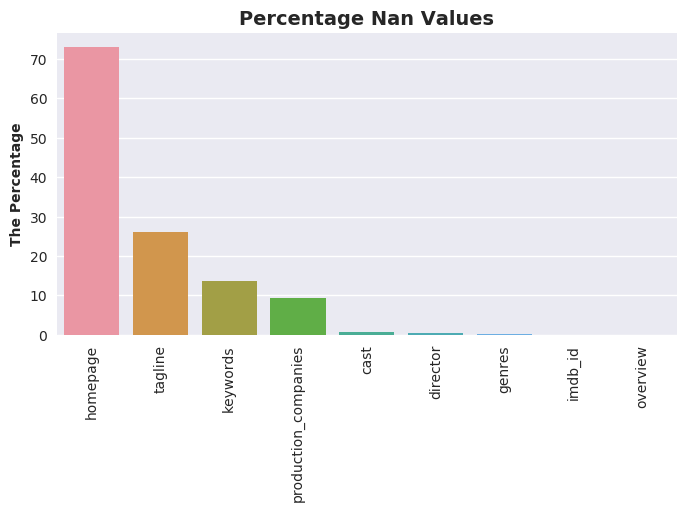

In [12]:
# Visualization of the percent_nan
plt.figure(figsize = (8,4), dpi = 100)
sns.barplot(x = percent_nan.index, y = percent_nan.values[:,1], data=percent_nan)
plt.xticks(rotation = 90)

plt.title(f'percentage nan values'.title(), fontsize=14, weight='bold')
plt.ylabel(f'the percentage'.title(), fontsize=10, weight="bold")

plt.show()


> There are columns that are not neccessary for us in the analysis ==> we will **drop** them!
>
> There are **duplicate values**
>
> There are **missing data**
>
> we will **create columns** that will help uss in the analysis


### Data Cleaning 

In [13]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [14]:
# Insert column about the decade
BINS = [1960,1970,1980,1990,2000,2010,2015]
LABELS =['60s','70s','80s','90s', '2000s', '2010s']

decade = pd.cut(df['release_year'], bins = BINS, labels = LABELS)
df.insert(2, 'decade', decade)

In [15]:
# drop the columns
df.drop(DROP_COLUMNS, axis=1, inplace=True)

In [16]:
# deleaing with missing data
df.dropna(inplace=True)

In [17]:
# Insert columns about the Profit
profit =  df['revenue_adj'] - df['budget_adj']
df.insert(3,'profit', profit)

<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### Year of release vs Profitability

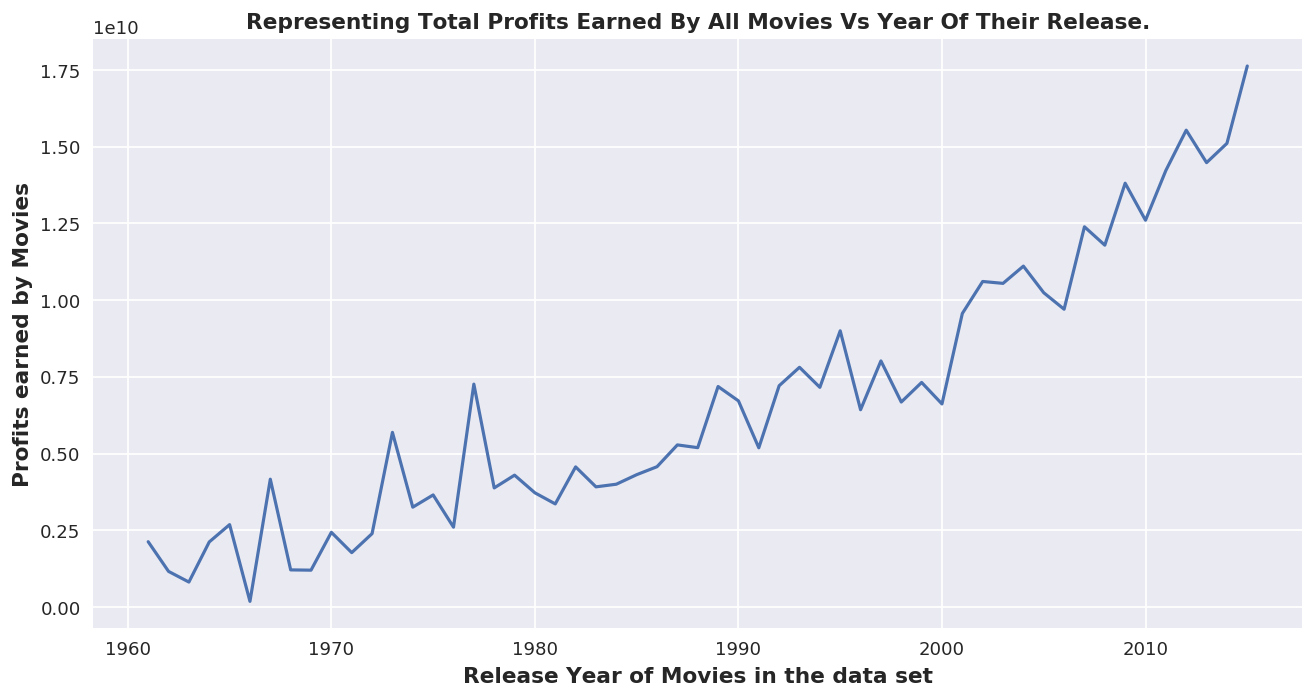

In [18]:
#We will be using Line plot for this analysis
#Since we want to know the profits of movies for every year therefore we have to sum up all the movies of a particular year

profits_year = df.groupby('release_year')['profit'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12, weight='bold')
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12, weight='bold')
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.'.title(), weight='bold')

#plotting the graph
plt.plot(profits_year)

plt.show()

In [19]:
#To find that which year made the highest profit?
profits_year.idxmax()

2015

In [20]:
#To find that which year made the highest profit?
profits_year.idxmin()

1966

<a id='subset'></a>
> So we can conclude both graphically as well as by calculations that year 2015 was the year where movies made the highest    
profit.
> 
> We are now done with analysing the given dataset.We will now find characteristics of profitable movies.
>
> ### With respect to the profitable movies
>
> Before moving further we need to clean our data again. We will be considering only those movies who have earned a significant > amount of profit.
> 
> **So lets fix this amount to 40 million dollar**.

In [21]:
#selecting the movies having profit $40M or more
profit_data = df[df['profit'] >= 40000000]

#reindexing new data
profit_data.index = range(len(profit_data))

# we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

# shape
profit_data.head()

,id,decade,popularity,profit,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
1,135397,2010s,32.985763,1.254446e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
2,76341,2010s,28.419936,2.101614e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
3,262500,2010s,13.112507,1.704191e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
4,140607,2010s,11.173104,1.718723e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
5,168259,2010s,9.335014,1.210949e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='q2'></a>
### Which genres are most popular from year to year?

In [22]:
# split genres string, at |, explode the list to rows
genres_df = profit_data.assign(genres=profit_data['genres'].str.split('|')).explode('genres')
genres_df.head(1)

# group exploded dataframe by genres, get average popularity
gen_pop = genres_df.groupby('genres').popularity.mean().sort_values(ascending=True)
gen_pop

genres
Foreign            0.201872
TV Movie           0.273628
Documentary        0.421015
Music              1.174369
Horror             1.218345
Romance            1.248074
History            1.300916
Comedy             1.329658
Drama              1.374860
Crime              1.413851
Mystery            1.531552
Western            1.659973
War                1.758336
Family             1.766941
Thriller           1.775742
Animation          2.123440
Action             2.142254
Fantasy            2.194949
Adventure          2.395293
Science Fiction    2.779054
Name: popularity, dtype: float64

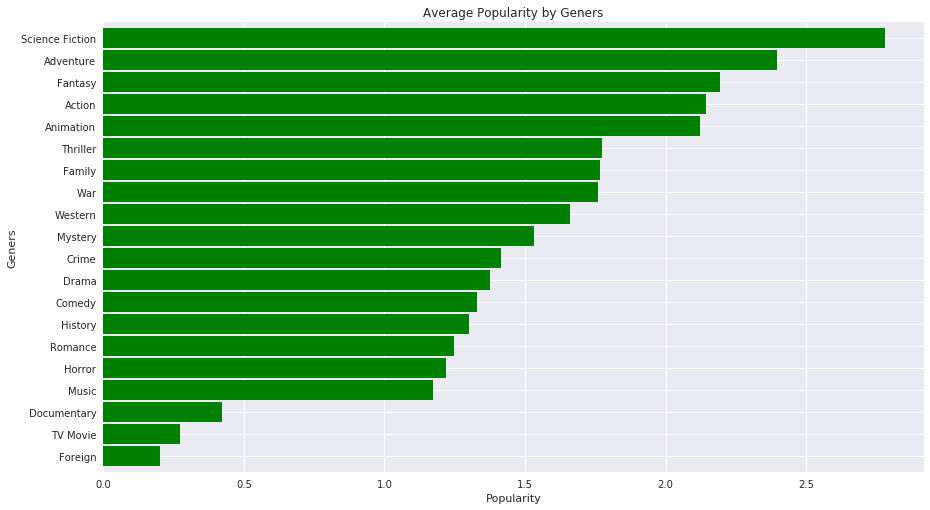

In [23]:
gen_pop.plot.barh(color=['green'], width=0.9, figsize=[14.70,8.27], rot=0)

# add title/ labels
plt.xlabel("Popularity")
plt.ylabel("Geners")
plt.title( "Average Popularity by Geners")
plt.show()

> **Science Fiction** is the highest popularity 
>
> **Foreign** is the lowest popularity

<a id='q3'></a>
### The most profit decade by decade?

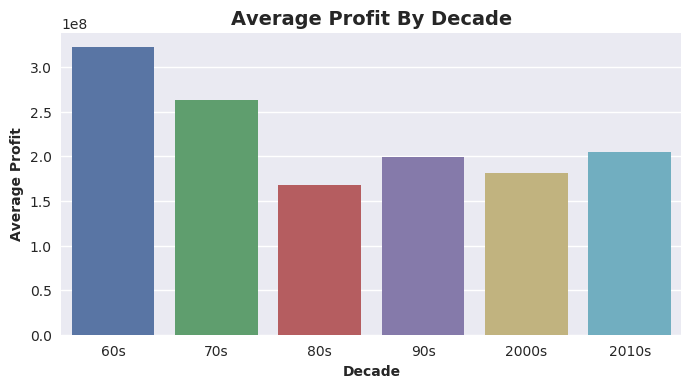

In [24]:
bar_plot('decade','profit', profit_data)

> **60s** is the higest average profit
>
> **80s** is the lowest average profit

<a id='q4'></a>
### The most budjet decade by decade?

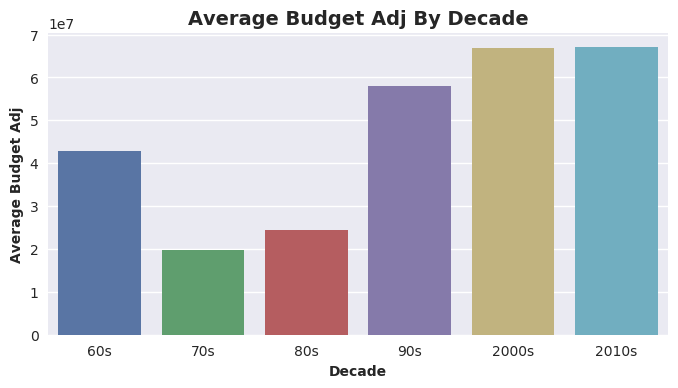

In [25]:
bar_plot('decade','budget_adj', profit_data)

> **2010s** is the highest average budjet and so colse **2000s**
>
> **70s** is the lowest average budjet

<a id='q5'></a>
### The most revenue decade by decade?

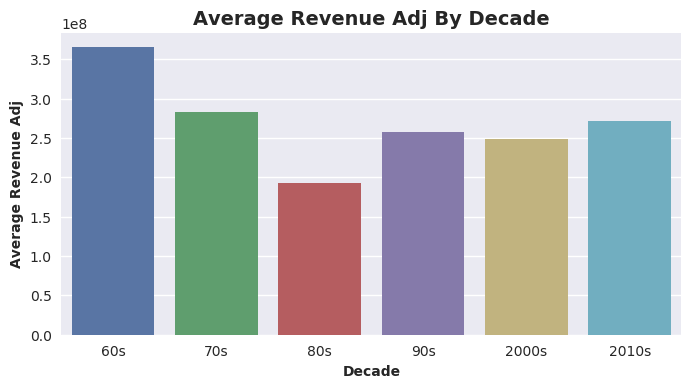

In [26]:
bar_plot('decade','revenue_adj', profit_data)

> **60s** is the highest average revenue 
>
> **80s** is the lowest average revenue 

<a id='q6'></a>
### Shows the distribution of the budget by genres

In [27]:
# Sort the data acording to the sample numbers, sellecting the top 5
df_1 = profit_data.groupby(['genres'])[['id']].count().sort_values(by=['id'], ascending=False)[0:5]
df_new = profit_data[profit_data['genres'].isin(df_1.index.values.tolist())]

#remove budget equals zero 
df_new1 = df_new[df_new['budget_adj'] > 0]

In [28]:
pd.DataFrame(df_new1.groupby(['genres'])['budget_adj'].describe().loc[:,['mean', 'std']])

,mean,std
genres,,
Comedy,3.574864e+07,2.233338e+07
Comedy|Drama|Romance,3.533075e+07,2.714370e+07
Comedy|Romance,4.748812e+07,2.717509e+07
Drama,3.720994e+07,2.605793e+07
Drama|Romance,2.984139e+07,2.035990e+07


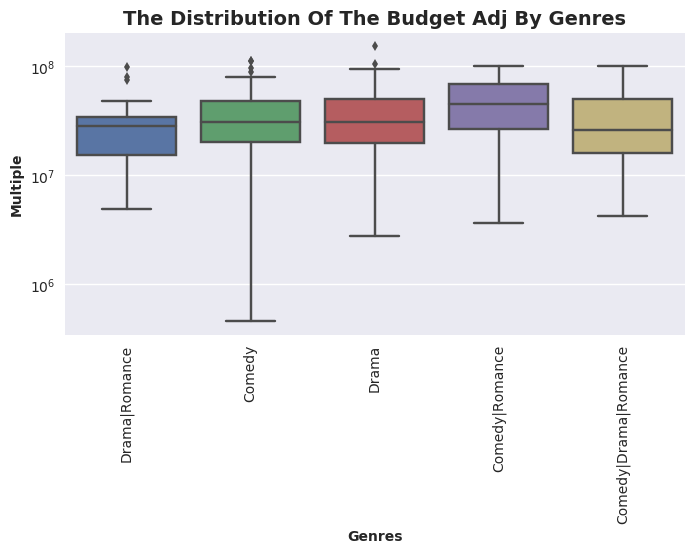

In [29]:
box_plot('genres', 'budget_adj', df_new1, True)

> the largest range in the budget in **Comedy Movies**
>
> The smallest range in the budget in **Drama|Romance Movies** 

<a id='conclusions'></a>
## Conclusions

> This was a very interesting data analysis. We came out with some very interesting facts about movies
> After this analysis we can conclude following:

> **(2015) Movies** is the year with highest Profit and **(1966) Movies** is the year with highest Profit
>
> **Science Fiction Movies** is the highest popularity and
> **Foreign Movies** is the lowest popularity
>
> **60s Movies** is the higest average profit
and
> **80s Movies** is the lowest average profit
>
> **2010s Movies** is the highest average budjet and so colse **2000s Movies**
and
> **70s Movies** is the lowest average budjet
>
> **60s Movies** is the highest average revenue 
and
> **80s Movies** is the lowest average revenue 
>
> the largest range in the budget in **Comedy Movies**
and
> The smallest range in the budget in **Drama|Romance Movies** 


> **Limitations:** This analysis was done considering the movies which had a significant amount of profit of around **40 million dollar**. This might not be completely error free but by following these suggestion one can increase the probability of a movie to become a hit. Moreover we are not sure if the data provided to us is completely correct and up-to-date.So a disparity arises here which can state the complete analysis wrong. Dropping the rows with missing values also affected the overall analysis.

In [30]:
# from subprocess import call
# call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])